# Reconocimiento Facial

In [10]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt

In [6]:
faces = fetch_lfw_people(min_faces_per_person = 60)

In [7]:
print(faces.target_names)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']


In [9]:
print(faces.images.shape)

(1348, 62, 47)


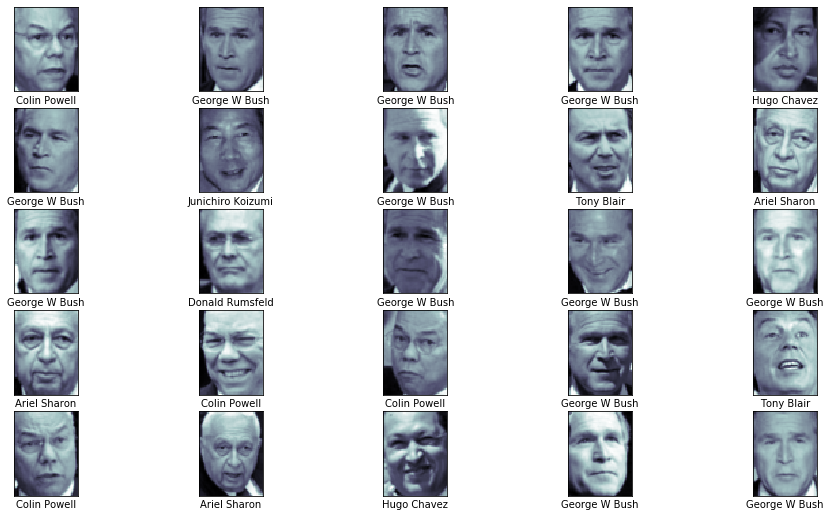

In [14]:
fig, ax = plt.subplots(5,5, figsize = (16,9))
for i, ax_i in enumerate(ax.flat):
    ax_i.imshow(faces.images[i], cmap = "bone")
    ax_i.set(xticks = [], yticks = [], xlabel = faces.target_names[faces.target[i]])

In [15]:
62*47 #pixeles

2914

In [16]:
# Haremos un pre procesado mediante análisis de componentes principales, esto lo veremos mas adelante

In [19]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as Randomized
from sklearn.pipeline import make_pipeline

In [20]:
pca = Randomized(n_components = 150, whiten =  True, random_state = 42)
svc = SVC(kernel = "rbf", class_weight= "balanced")
model = make_pipeline(pca,svc)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(faces.data, faces.target, random_state = 42)

In [28]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [32]:
param_grid = {
    
    "svc__C": [0.1,1,5,10,50],
    "svc__gamma": [0.0001, 0.0005,0.001,0.005,0.01]
}

grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain,Ytrain)

# ojo con los __, estos son necesarios, buscar bien detalles en sklearn

CPU times: user 55.3 s, sys: 0 ns, total: 55.3 s
Wall time: 45.9 s


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=150, random_state=42,
                                            svd_solver='auto', tol=0.0,
                                            whiten=True)),
                                       ('svc',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200,
                                            class_weight='balanced', coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            ran

In [33]:
print(grid.best_params_)

{'svc__C': 10, 'svc__gamma': 0.001}


In [34]:
classifier = grid.best_estimator_
yfit = classifier.predict(Xtest)

Text(0.5, 0.98, 'Predicciones de las imágenes (incorrectas en rojo )')

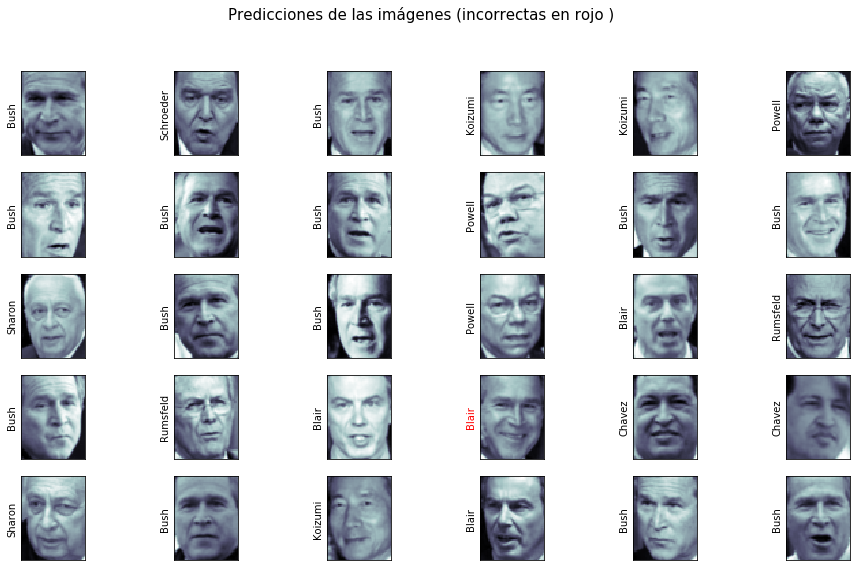

In [35]:
fig, ax = plt.subplots(5,6, figsize=(16,9))

for i, ax_i in enumerate(ax.flat):
    ax_i.imshow(Xtest[i].reshape(62,47), cmap= "bone")
    ax_i.set(xticks = [], yticks = [])
    ax_i.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color = "black" if yfit[i] == Ytest[i] else "red")

fig.suptitle("Predicciones de las imágenes (incorrectas en rojo )", size =15)

In [36]:
from sklearn.metrics import classification_report

In [38]:
print(classification_report(Ytest,yfit,target_names = faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



precisicion es lo que llamabamos la sensibiliadad , y el recaall es lo que llamabamos la especifidad.
support es el numero de veces que aparecia el individuo

In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
mat = confusion_matrix(Ytest,yfit)

In [41]:
import seaborn as sns; sns.set()

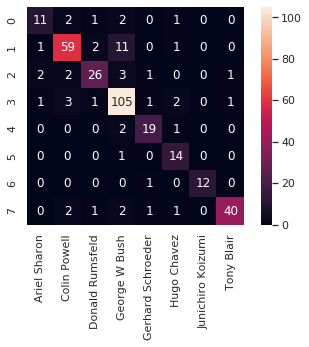

In [43]:
sns.heatmap(mat.T, square = True , annot = True, fmt = 'd', cbar=  True, xticklabels = faces.target_names)

Investigar libreria opencv, para la clasificación de imagenes